In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import os
from matplotlib import pyplot as plt

import cv2


In [3]:
import tensorflow as tf
# import imghdr


#### Print directory file names


In [4]:

for dirname, _, filenames in os.walk('/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024'):
    print(dirname)
    # for filename in filenames:
    #     print(os.path.join(dirname, filename))
        

/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation/9
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation/0
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation/7
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation/6
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation/1
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation/8
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation/4
/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxN

In [5]:
training_dir = '/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train'
for dirname, _, filenames in os.walk('/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024'):
    # Check if the current directory is the training directory
    if dirname == training_dir:
        
        for filename in filenames:
            # Construct the full file path
            print(os.path.join(dirname, filename))
            
        

/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train/.DS_Store


1152 768 3


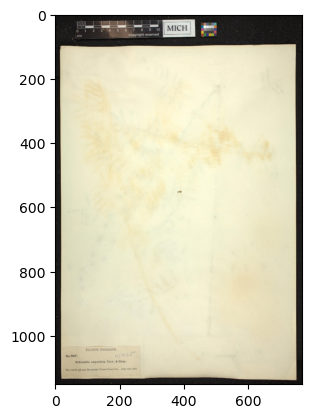

In [6]:
img = cv2.imread('/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-test/BTTAIxNYBG-test/d0e8f2b2b8f2f0f2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
height, width, channels = img.shape
print (height, width, channels)

In [7]:

for dirname, _, filenames in os.walk('bttai-nybg-2024/'):
    # Check if the current directory is the training directory
    print(filename)
    if dirname == training_dir:
        for filename in filenames:
            # Construct the full file path
            full_path = os.path.join(dirname, filename)
            print(full_path)


In [8]:
train_data = "/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train.csv"
df_train = pd.read_csv(train_data)
df_train.head(10)

,uniqueID,classLabel,classID,source,imageFile
0,2,occluded-specimens,8,L,a1a8b48e8cb142b3.jpg
1,3,microscope-slides,6,L,79599db2ac9092b6.jpg
2,4,illustrations-color,2,BHL,c449696f2f0d0d92.jpg
3,5,illustrations-color,2,P,80a8f4a393b4e08c.jpg
4,6,animal-specimens,0,AK,041a1c6e73313638.jpg
5,8,occluded-specimens,8,L,ccf1b1ccacb8f8b3.jpg
6,11,live-plants,4,US,246c8e9612111a24.jpg
7,12,biocultural-specimens,1,C,b0b337313164a0f0.jpg
8,13,microscope-slides,6,L,b3931bc4cc2b2925.jpg
9,15,illustrations-gray,3,BR,ebf7674e4c2c0e6e.jpg


#### Split images to files based on their class label

In [9]:
import shutil
# create subdirectories for each unique classLabel (str)
labels = df_train['classLabel'].unique()
for label in labels:
    dir_path = os.path.join(training_dir, str(label))
    os.makedirs(dir_path, exist_ok=True)    

for _, row in df_train.iterrows():
    label = str(row['classLabel'])
    img_name = row['imageFile']
    path = os.path.join(training_dir, img_name)
    new_path = os.path.join(training_dir,label)
    shutil.move(path, new_path)


Error: Destination path '/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train/occluded-specimens/a1a8b48e8cb142b3.jpg' already exists

## Image Data Preprocessing / Augmentation

In [20]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    labels='inferred', #label inferred from subdirectories containing images of each class
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None, #Optional random seed for shuffling and transformations.
    validation_split=None,
    subset=None,
    interpolation='bicubic', #interpolation method used when resizing images
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 81946 files belonging to 10 classes.


In [27]:
train_dataset
train_class = train_dataset.class_names
train_class



['animal-specimens',
 'biocultural-specimens',
 'illustrations-color',
 'illustrations-gray',
 'live-plants',
 'micrographs-transmission-light',
 'microscope-slides',
 'mixed-pressed-specimens',
 'occluded-specimens',
 'ordinary-pressed-specimens']

tf.Tensor(0.0, shape=(), dtype=float32)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


NameError: name 'title_label' is not defined

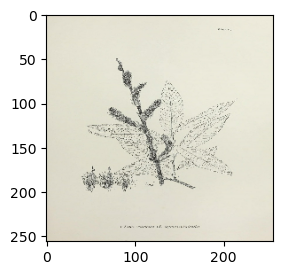

In [34]:
for images, labels in train_dataset.take(1):  # Take a single batch
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display first 9 images of the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        label = labels[i]
        
        # Convert label tensor to integer index
        label_index = labels[i].numpy()  # Convert TensorFlow tensor to numpy array
    
        title_label = train_class[int(tf.argmax(label_index).numpy)]  # Convert to int if necessary
        
        plt.title(title_label)
        plt.axis('off')

Label Mappings for classes present in the training and validation datasets

0 : animal-specimens
1 : biocultural-specimens
2 : illustrations-color
3 : illustrations-gray
4 : live-plants
5 : micrographs-transmission-light
6 : microscope-slides
7 : mixed-pressed-specimens
8 : occluded-specimens
9 : ordinary-pressed-specimens


#### Load & Pre Process Training Data
- resize image / crop 

In [9]:

dataset_train = tf.keras.utils.image_dataset_from_directory(
    '/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-train/BTTAIxNYBG-train',
    image_size=(256, 256),  # Specify the image size to which all images will be resized
    batch_size=32  # Specify the batch size
)


Found 81946 files belonging to 10 classes.


2024-03-10 16:41:00.375730: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-10 16:41:00.375948: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-10 16:41:00.375962: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-10 16:41:00.376575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-10 16:41:00.377232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

data_iterator = dataset_train.as_numpy_iterator()
data_train = dataset_train.map(lambda x,y: (x/255, tf.one_hot(y.astype(np.int32), depth=10)))
train_data = data_train.as_numpy_iterator()

data_train_x = data_train.map(lambda x, y: x)
data_train_y = data_train.map(lambda x, y: y)

x_train = data_train_x.as_numpy_iterator()
y_train = data_train_y.as_numpy_iterator()



#### Load and Pre-process Validation Data

In [14]:
val_data = "/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation.csv"
df_val = pd.read_csv(val_data)
df_val.head(20)


,uniqueID,classLabel,classID,source,imageFile
0,7,microscope-slides,6,K,f09a8abe9e9e9ef2.jpg
1,20,illustrations-color,2,BHL,a6c6868387c6af8c.jpg
2,37,ordinary-pressed-specimens,9,YU,6062c68e8c34b292.jpg
3,59,animal-specimens,0,CAS,363617271597dfd9.jpg
4,60,biocultural-specimens,1,Met,4218d8d2f42b05e4.jpg
5,75,illustrations-gray,3,BHL,a08d868b0f0d8484.jpg
6,77,ordinary-pressed-specimens,9,US,6a66c64e1ccdb3f1.jpg
7,88,occluded-specimens,8,MICH,f8e6b0b2b2bafaf2.jpg
8,90,micrographs-transmission-light,5,Tw,c69656e6c6d4c68e.jpg
9,91,live-plants,4,P,e66268a9d0db4e4c.jpg


In [15]:

val_dir = '/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation'
labels = df_val['classID'].unique()

for label in labels:
    dir_path = os.path.join(val_dir, str(label))
    os.makedirs(dir_path, exist_ok=True)    



In [ ]:
for _, row in df_val.iterrows():
    label = str(row['classID'])
    img_name = row['imageFile']
    path = os.path.join(val_dir, img_name)
    new_path = os.path.join(val_dir,label)
    shutil.move(path, new_path)

In [21]:


dataset_val = tf.keras.utils.image_dataset_from_directory(
    '/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-validation/BTTAIxNYBG-validation',
    image_size=(256, 256),  # Specify the image size to which all images will be resized
    batch_size=32  # Specify the batch size
)

Found 10244 files belonging to 10 classes.


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

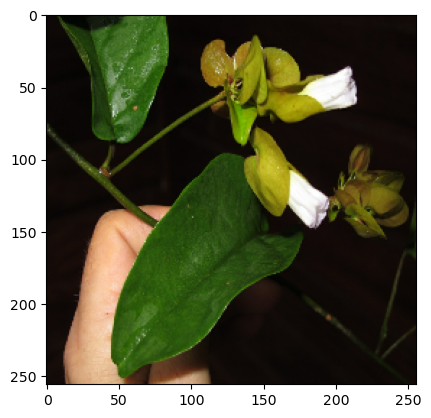

In [ ]:

data_= dataset_val.as_numpy_iterator()

data_val= dataset_val.map(lambda x,y: (x/255, tf.one_hot(y.astype(np.int32), depth=10)))
data_val.as_numpy_iterator().next()
data_val_x = data_val.map(lambda x, y: x)
data_val_y = data_val.map(lambda x, y: y)
x_val = data_val_x.as_numpy_iterator().next()
y_val = data_val_y.as_numpy_iterator().next()
plt.imshow(x_val[20])
y_val[20]


#### MODEL BUILDING 
improve model accuracy by improve number filter, kernel size,add resuidal layers
create a number of residual blocks
for loop add residual block into sequential model 
add input output of residual block  

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (16,16), padding='same', activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(32, (16,16), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (8,8), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (8,8), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [101]:
# number of filter/kernel
# convolutional filters : large enough to capture the feature of the image
# model.add(Conv2D(32, (16,16), activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (8,8),  activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(10, activation='softmax'))

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [103]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 256, 256, 32)      24608     
                                                                 
 conv2d_27 (Conv2D)          (None, 256, 256, 32)      262176    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 64)      131136    
                                                                 
 conv2d_29 (Conv2D)          (None, 128, 128, 64)      262208    
                                                      

MODEL TRAINING 

In [22]:
hist = model.fit(x=x_train,y=y_train,
                epochs= 20, 
                # validation_data=(x_val, y_val), 
                callbacks=[tensorboard_callback])

ValueError: `y` argument is not supported when using python generator as input.

In [17]:
import datetime
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


epochs = 5

hist = model.fit(train_generator, epochs=50, 
                # validation_data=validation_generator,
                verbose=2,
                callbacks=[tensorboard_callback])




Epoch 1/50


2024-03-10 16:42:42.671423: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 9990922884361642513
2024-03-10 16:42:42.671667: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 11318727963341814341


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/Relu' defined at (most recent call last):
    File "/Users/mori/tensorflow-test/env/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/mori/tensorflow-test/env/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 701, in start
      self.io_loop.start()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell
      await result
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cd/2nv0kznn5nl54vys2bwv20mh0000gn/T/ipykernel_69171/3607531774.py", line 12, in <module>
      hist = model.fit(train_generator, epochs=50,
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential/dense/Relu'
Detected at node 'sequential/dense/Relu' defined at (most recent call last):
    File "/Users/mori/tensorflow-test/env/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/mori/tensorflow-test/env/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 701, in start
      self.io_loop.start()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell
      await result
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cd/2nv0kznn5nl54vys2bwv20mh0000gn/T/ipykernel_69171/3607531774.py", line 12, in <module>
      hist = model.fit(train_generator, epochs=50,
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/Users/mori/tensorflow-test/env/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential/dense/Relu'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  In[0] mismatch In[1] shape: 1098304 vs. 262144: [32,1098304] [262144,128] 0 0
	 [[{{node sequential/dense/Relu}}]]
	 [[sequential/dense_1/Softmax/_20]]
  (1) INVALID_ARGUMENT:  In[0] mismatch In[1] shape: 1098304 vs. 262144: [32,1098304] [262144,128] 0 0
	 [[{{node sequential/dense/Relu}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1222]

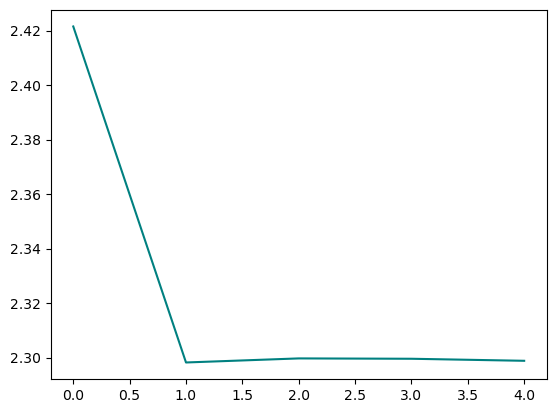

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')

In [30]:


test_data ='/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024//BTTAIxNYBG-test/BTTAIxNYBG-test.csv'
test_dir = '/Users/mori/Desktop/kaggle_challenge/bttai-nybg-2024/BTTAIxNYBG-test/BTTAIxNYBG-test'

df_test = pd.read_csv(test_data)

data_test = []
for _, row in df_test.iterrows():
    dir_path = os.path.join(test_dir,row['imageFile'] )
    img = cv2.imread(dir_path)
    resize = tf.image.resize(img, (256,256))
    data_test.append(resize)
    

data_test= data_test.map(lambda x: x/255)
data_test.as_numpy_iterator().next()
data_test = data_test.as_numpy_iterator().next()[0]



AttributeError: 'list' object has no attribute 'map'

In [26]:
model.predict(x_test)

NameError: name 'x_test' is not defined